## Outline
1. Generate data that is not linearly separable
2. Train with SN and see performance
3. Write from scratch our first feed forward network
4. Train the FF network on the data and compare with SN
5. Write a generic class for a FF network
6. Train generic class on binary classification 
7. Generate data for multi-class classification
8. Train a FF network for 7
9. Use softmax as the output layer and cross-entropy loss function
10. Train with 8 for multi-class classification
11. Exercise on other datasets

# Setup

In [1]:
# previously used libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

# new libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [2]:
class SigmoidNeuron:
    
    def _init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    # gradient w mean squared error loss
    def grad_w_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    # gradient b mean squared error loss
    def grad_b_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
      
    # gradient w Cross Entropy
    def grad_w_ce(self, x, y):
      y_pred = self.sigmoid(self.perceptron(x))
      if y == 0:
        return y_pred * x
      elif y == 1:
        return -1 * (1 - y_pred) * x
      else:
        raise ValueError("y should be 0 or 1")
       
    # gradient b Cross Entropy
    def grad_b_ce(self, x, y):
      y_pred = self.sigmoid(self.preceptron(x))
      if y == 0:
        return y_pred
      elif y == 1:
        return -1 * (1 - y_pred)
      else:
        raise ValueError("y should be 0 or 1")
 
    def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, loss_fn = "mse", display_loss = False):
        
        # initialise w, b
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
            
        if display_loss:
            loss = {}
        
        for i in tqdm_notebook(range(epochs), total = epochs, unit = 'epoch'):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
              if loss_fn == "mse":
                dw += self.grad_w_mse(x, y)
                db += self.grad_b_mse(x, y)
              elif loss_fn == "ce":
                dw += self.grad_w_ce(x, y)
                db += self.grad_b_ce(x, y)
            
            m = X.shape[1]
            self.w -= learning_rate * dw/m
            self.b -= learning_rate * db/m
            
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss[i] = mean_squared_error(Y_pred, Y)
        
        if display_loss: 
            Y_pred = self.sigmoid(self.perceptron(X))
            if loss_fn == "mse":
              loss[i] = mean_squared_error(Y, Y_pred)
            elif loss_fn == "ce":
              loss[i] = log_loss(Y, Y_pred)
              
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            if loss_fn == "mse":
              plt.ylabel('Mean Squared Error')
            elif loss_fn == "ce":
              plt.ylabel('Log Loss')
            plt.show()
    
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)


In [3]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

# Generate data

In [4]:
data, labels = make_blobs(n_samples = 1000, centers = 4, n_features = 2, random_state = 0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


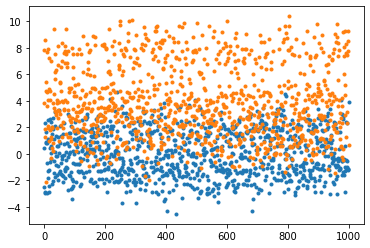

In [5]:
plt.plot(data, ".")
plt.show()

**Scatter plot**

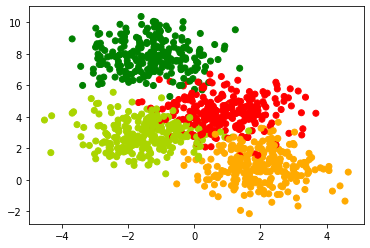

In [6]:
# scatter(x axis as feature 0, y axis as feature 1)
plt.scatter(data[:,0], data[:,1], c = labels, cmap = my_cmap)
plt.show()

First we will generate a binary classification data. We will combine these 4 centers into 2 centers.
<br>One way of doing this is by taking original labels and store them. 
<br>Take the remainders of the labels when divided by two. Hence we get two classes of data. One with remainder 1 and the other with remainder 0.



In [7]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

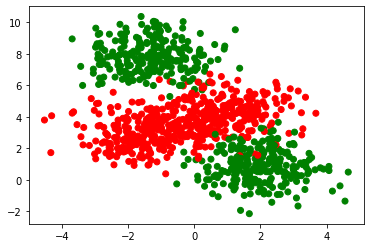

In [8]:
plt.scatter(data[:,0], data[:,1], c = labels, cmap = my_cmap)
plt.show()

**Hence** we got data which is linearly not separable.

**Train Test Split**

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


# SN classification

TypeError: float() argument must be a string or a number, not 'dict_values'

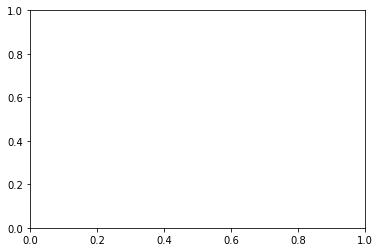

In [10]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs = 1000, learning_rate = 0.5, display_loss = True)

In [ ]:
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = sn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >=0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

**Now we will plot the values what the model is predicting. And see whether it is predicting correctly or not at each point.**

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1], c = Y_pred_binarised_train, cmap = my_cmap, s = 15*(np.abs(Y_pred_binarised_train - Y_train)+.2))
plt.show()

In above plot, we use the **scatter()** function.
<br>
We chose the color, **<font color = "green">c = Y_pred_binarised_train</font>** so as to mark the predicted outputs. 
<br>
The color shows the value predicted of the dot.
 <br>
 The size of the point represents how correct it is.<br>
 **A bigger dot is incorrect prediciton**
 <br>
 **A smaller dot is correct prediction**

**Conclusion**
1. Sigmoid neuron is unable to classify this data.
2. It is still trying to make a line pssing through the data points so as to minimize the loss.
3. Since it is trying to separate a non-linearly separable data, hence making a complete mess of the points in the upper center (classifying all of them wrong).
<br><br><br>
**Hence Sigmoid Neuron is unable to solve our problem.**

# Our First FF Network

In [ ]:
class FirstFFNetwork:
  
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3
  
  def grad(self, x, y):
    self.forward_pass(x)
    
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
  
    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        
      m = X.shape[1]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# FFNetwork Classification

In [ ]:
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs = 2000, learning_rate = 0.01, display_loss = True)

In [ ]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c = Y_pred_binarised_train, cmap = my_cmap, s = 15*(np.abs(Y_pred_binarised_train - Y_train) + 0.2))
plt.show()

In the above plot, all the point with smaller radius are correctly classified and those with a larger radius are incorrectly classified.

# Feed Forward Network - Generic Class

In [ ]:
class FFSNNetwork:
    def __init__(self, n_inputs, hidden_sizes = [2]):
        # no. of inputs
        self.nx = n_inputs
        
        # no. of outputs
        self.ny = 1
        
        # no. of hidden layer
        self.nh = len(hidden_sizes)
        
        # total number of parameters required from L[0] to L[nh+1]
        self.sizes = [self.nx] + hidden_sizes + [self.ny]
        
        # weights and biases in the form of dictionaries
        self.W = {}
        self.B = {}
        for i in range(self.nh+1):
            # W[i+1] will have a size = (no. of elements in current layer =) rows and (no. of elemetns in next layer =) cols
            self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
            
            # Similarly, B[i+1] will have a size = 1 row and (no. of elements in next layer =) cols
            self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))

    def forward_pass(self, x):
        # dictionary containing all the pre-activation values
        self.A = {}

        # dictionary containing all the activated values
        self.H = {}

        # entering values of first layer that is the input laye in H[0]
        # H[0] = reshaped(1, -1), here -1 means take any number of value which is required.
        self.H[0] = x.reshape(1, -1)

        for i in range(self.nh+1):
            # Pre-activation: A = H*W + B
            self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]

            # Activation: H = sigmoid(A)
            self.H[i+1] = self.sigmoid(self.A[i+1])
        return self.H[self.nh+1]
    
    def grad(self, x, y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))

